In [49]:
from sklearn import linear_model,ensemble, tree, model_selection

import numpy as np
import pandas as pd


df = pd.read_csv("pair_dataset.csv", index_col=0)
X,y = df.drop('label', axis=1),df['label']
X,holdoutX,y,holdouty = model_selection.train_test_split(X,y,test_size = .1, random_state=42)

   

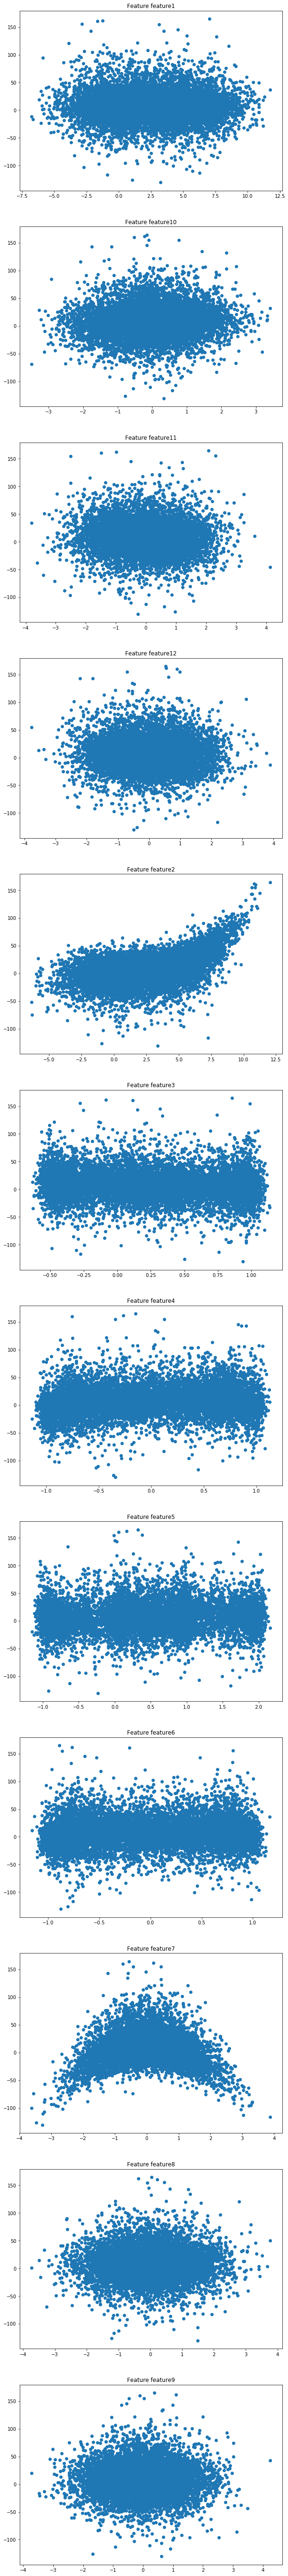

In [26]:
fig,ax = plt.subplots(ncols=1,nrows=len(X.columns),figsize=(10, 100))

for i,feature in enumerate(X):
    ax[i].scatter(X[feature],y)
    ax[i].set_title("Feature "+str(feature))

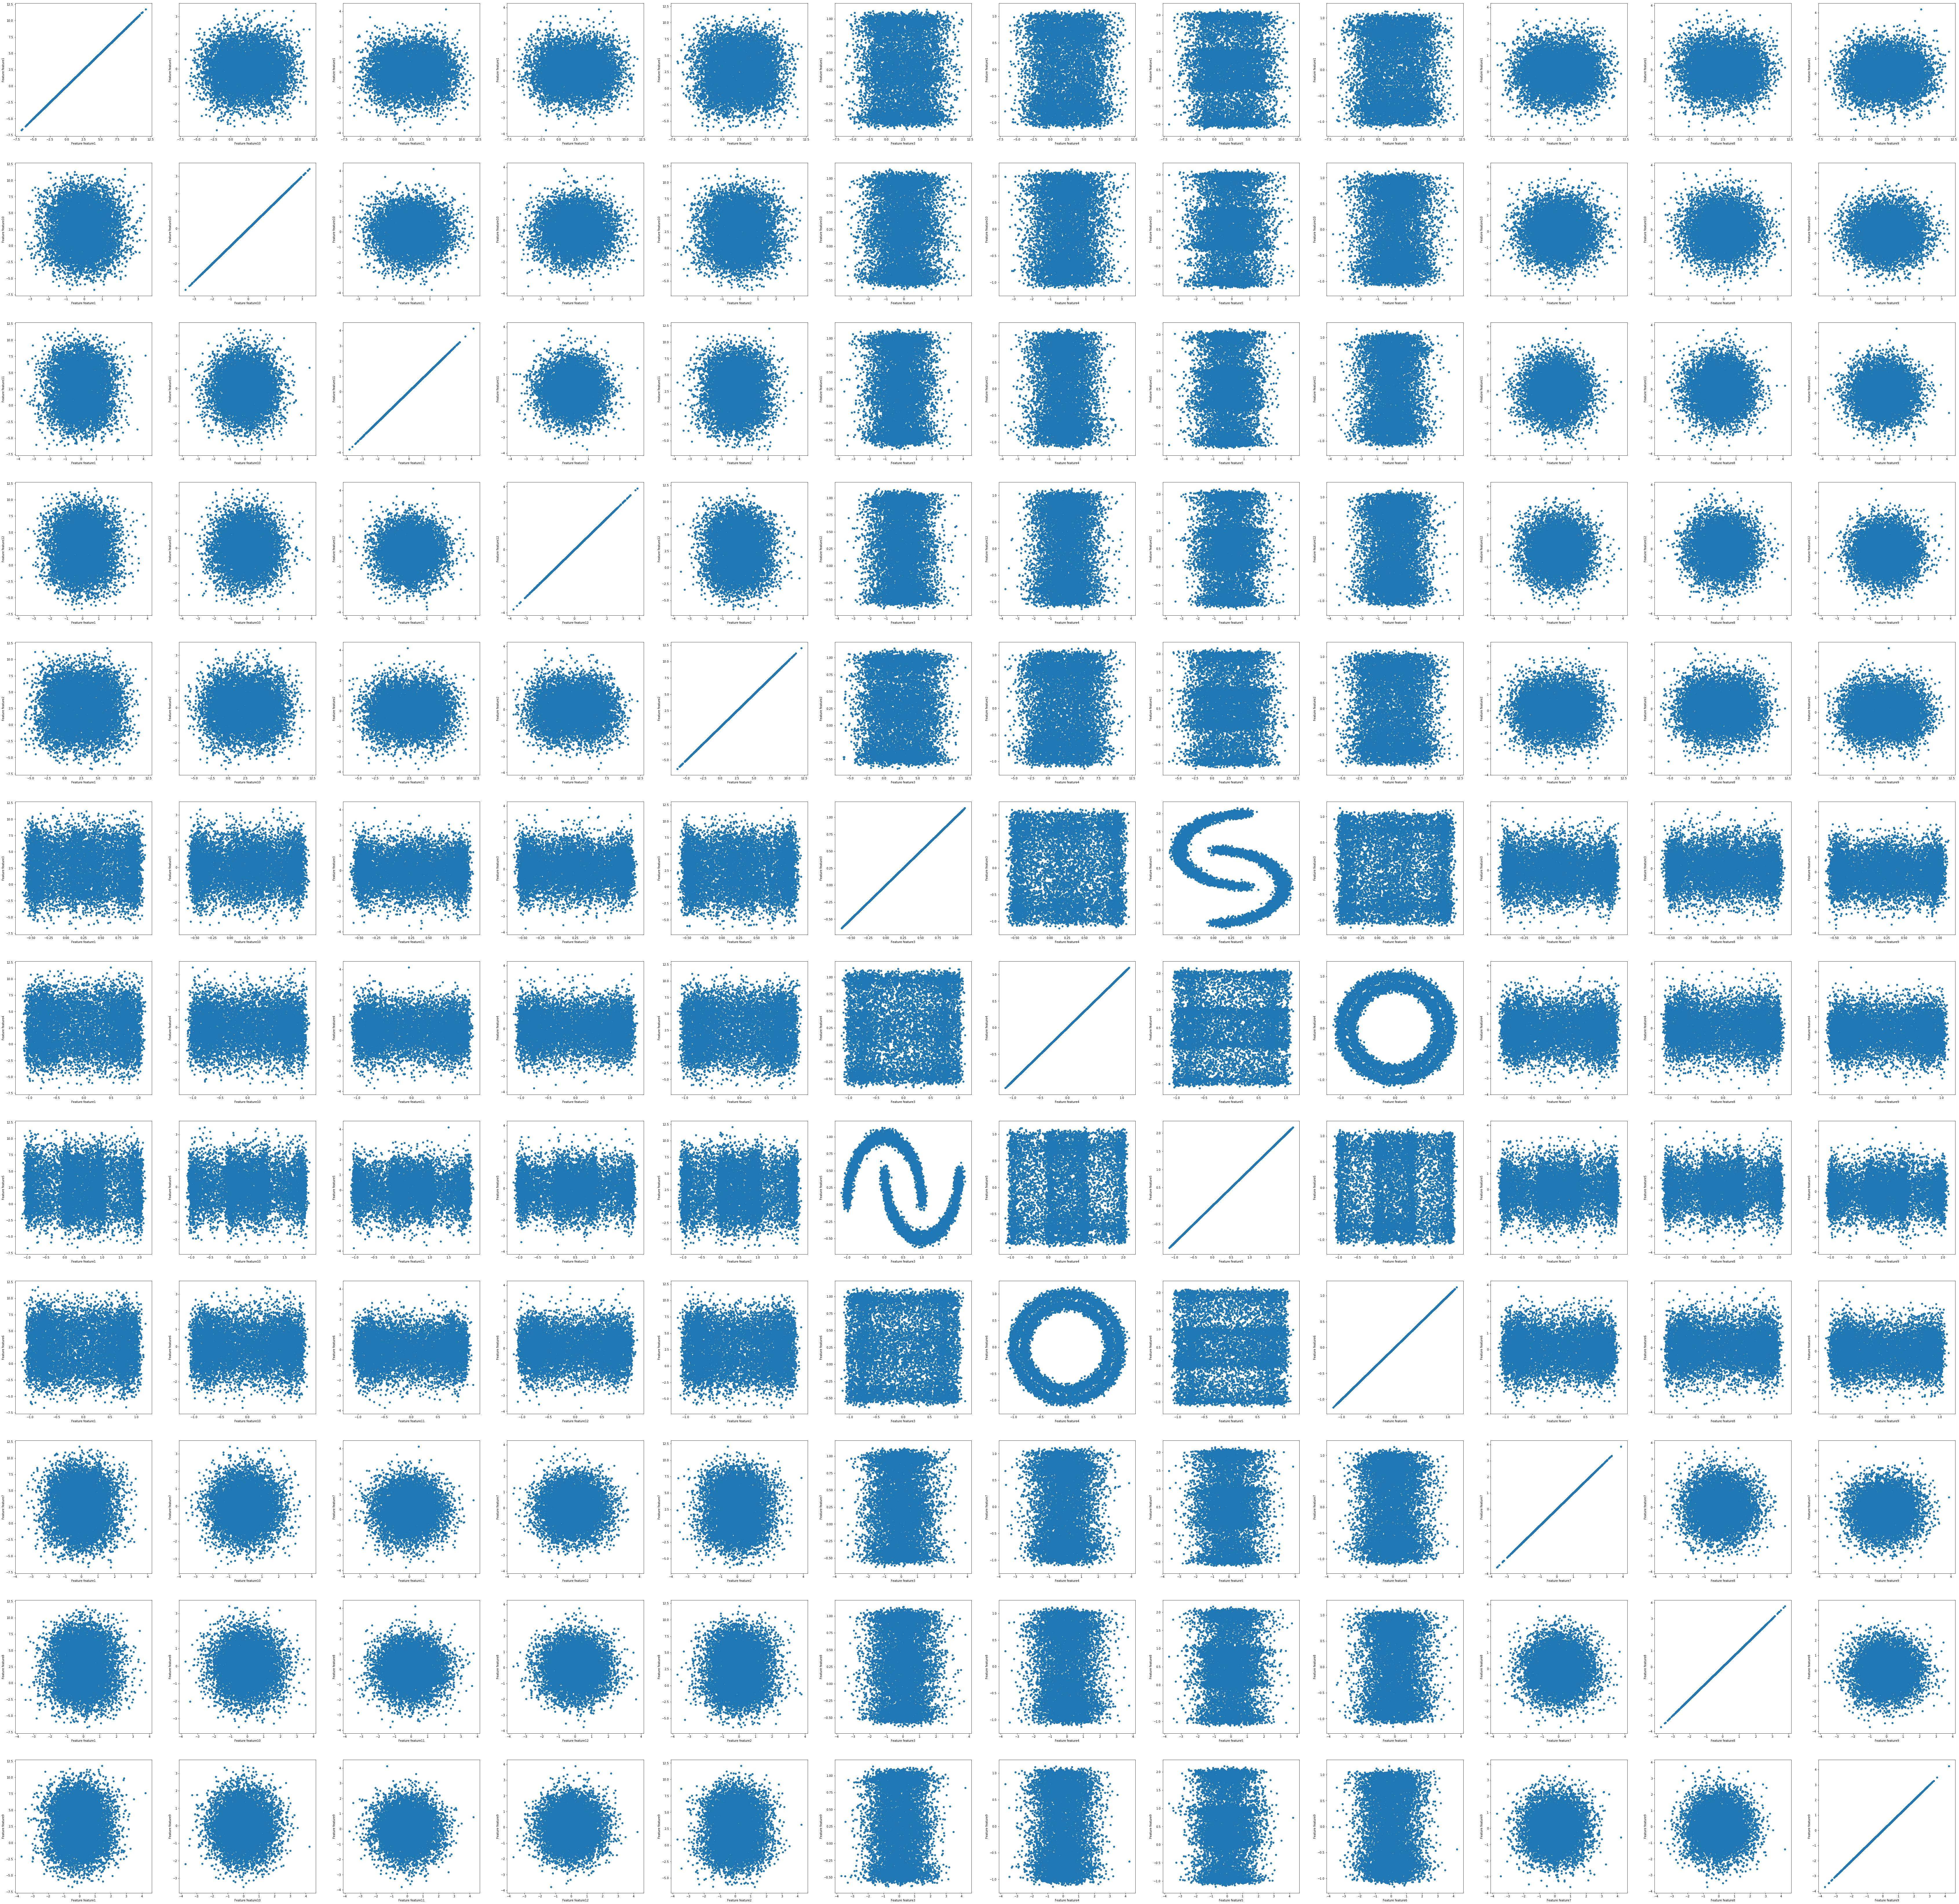

In [27]:
def scatter_matrix(X):
    feature_count = len(X.columns)
    fig,ax = plt.subplots(ncols=feature_count,nrows=feature_count,figsize=(10*feature_count, 10*feature_count))

    for i,feature_i in enumerate(X):
        for j,feature_j in enumerate(X):
            ax[i][j].scatter(X[feature_i],X[feature_j])
            ax[i][j].set_xlabel('Feature ' + str(feature_j))
            ax[i][j].set_ylabel('Feature ' + str(feature_i))

scatter_matrix(X)

In [12]:
X,holdoutX,y,holdouty = model_selection.train_test_split(X,y,test_size = .1)

models = {}
parameters = {}

models['linear_model'] = linear_model.LinearRegression()
models['ridge_model'] = linear_model.Ridge()
models['lasso_model'] = linear_model.Lasso(alpha=.5)
models['robust_regression'] = linear_model.SGDRegressor(loss='huber',n_iter=20)
models['eps_insensitive'] = linear_model.SGDRegressor(loss='epsilon_insensitive',n_iter=20)


models['cart'] = tree.DecisionTreeRegressor(max_depth=7)
models['extratrees'] = tree.ExtraTreeRegressor(max_depth=7)
models['randomForest'] = ensemble.RandomForestRegressor()
models['adaboostedTrees'] = ensemble.AdaBoostRegressor()
models['gradboostedTrees'] = ensemble.GradientBoostingRegressor()


for name,model in models.items():
    scores = model_selection.cross_val_score(model, X, y, n_jobs=1)
    print('Model: '+name)
    print("Score: " + str(np.mean(scores)))
    print()


Model: linear_model
Score: 0.238132767803

Model: ridge_model
Score: 0.238140790245

Model: lasso_model
Score: 0.235784885315

Model: robust_regression
Score: 0.186756959548

Model: eps_insensitive
Score: 0.224796419161

Model: cart
Score: 0.529299733238

Model: extratrees
Score: 0.444700666991

Model: randomForest
Score: 0.615894331451

Model: adaboostedTrees
Score: 0.542207319706

Model: gradboostedTrees
Score: 0.696762964686



In [36]:
coefs = models['randomForest'].fit(X,y).feature_importances_
sorted(zip(X.columns,coefs), key = lambda x:x[1], reverse=True)

[('feature2', 0.35382077435904907),
 ('feature7', 0.29844375417353036),
 ('feature4', 0.06412564425719168),
 ('feature6', 0.05239109780064418),
 ('feature3', 0.0378705656538047),
 ('feature11', 0.037731988826540122),
 ('feature12', 0.036447837284168963),
 ('feature8', 0.026656074857128183),
 ('feature1', 0.02540931847138464),
 ('feature9', 0.024023158534083773),
 ('feature5', 0.021818813081122469),
 ('feature10', 0.021260972701351896)]

In [40]:
X_reduced = X[['feature2','feature7','feature4','feature6','feature11','feature12']]

for name,model in models.items():
    scores = model_selection.cross_val_score(model, X_reduced, y, n_jobs=-1)
    print('Model: '+name)
    print("Score: " + str(np.mean(scores)))
    print()

Model: linear_model
Score: 0.221925358244

Model: ridge_model
Score: 0.221928153144

Model: lasso_model
Score: 0.220598554802

Model: robust_regression
Score: 0.193585659049

Model: eps_insensitive
Score: 0.213700595269

Model: cart
Score: 0.532102572346

Model: extratrees
Score: 0.451823935652

Model: randomForest
Score: 0.633292661423

Model: adaboostedTrees
Score: 0.543147691066

Model: gradboostedTrees
Score: 0.703907026635



In [19]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

def plot_overfit(X,y,model_obj,param_ranges,param_static=None): 
    for parameter,parameter_range in param_ranges.items():
        avg_train_score, avg_test_score = [],[]
        std_train_score, std_test_score = [],[]
        
        for param_val in parameter_range:
            param = {parameter:param_val}
            if param_static:
                param.update(param_static)
            
                
            model = model_obj(**param)
            
            train_scores,test_scores = [],[]
            for i in range(5):
                X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,test_size = .3)
                model.fit(X_train,y_train)
                
                train_scores.append(model.score(X_train,y_train))
                test_scores.append(model.score(X_test,y_test))
            
            avg_train_score.append(np.mean(train_scores))
            avg_test_score.append(np.mean(test_scores))
            
            std_train_score.append(np.std(train_scores))
            std_test_score.append(np.std(test_scores))
            
        fig,ax = plt.subplots()
        ax.errorbar(parameter_range,avg_train_score,yerr=std_train_score,label='training score')
        ax.errorbar(parameter_range,avg_test_score,yerr=std_test_score,label='testing score')
        
        ax.set_xlabel(parameter)
        ax.set_ylabel('score')
        ax.legend(loc=0)

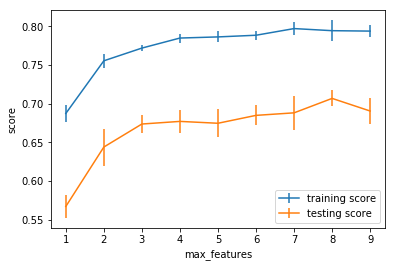

In [20]:
        
plot_overfit(X,y,ensemble.GradientBoostingRegressor,{'max_features':range(1,10)})

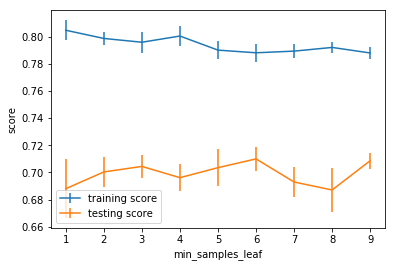

In [21]:
plot_overfit(X,y,ensemble.GradientBoostingRegressor,{'min_samples_leaf':range(1,10)})

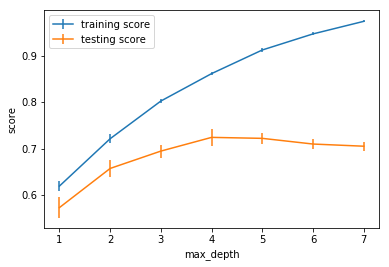

In [22]:
plot_overfit(X,y,ensemble.GradientBoostingRegressor,{'max_depth':range(1,8)})

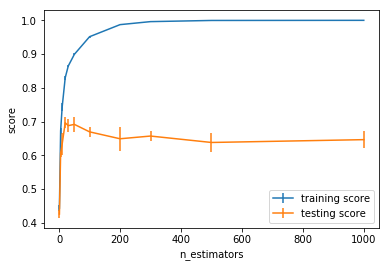

In [23]:
plot_overfit(X,y,ensemble.GradientBoostingRegressor,{'n_estimators':[1,5,10,20,30,50,100,200,300,500,1000]},param_static={'learning_rate':.75})

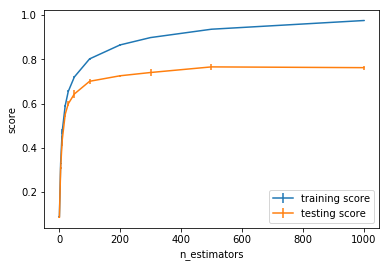

In [24]:
plot_overfit(X,y,ensemble.GradientBoostingRegressor,{'n_estimators':[1,5,10,20,30,50,100,200,300,500,1000]})

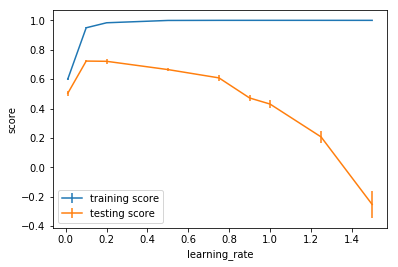

In [25]:

model = ensemble.GradientBoostingRegressor
params = {'learning_rate':[.01,.1,.2,.5,.75,.9,1,1.25,1.5]}
param_static = {'max_depth':6}
plot_overfit(X,y,model,params,param_static=param_static)

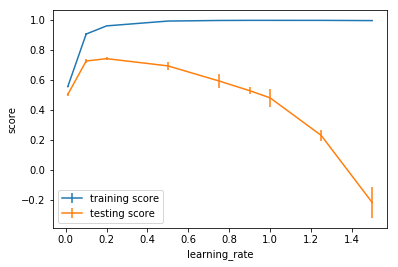

In [26]:
model = ensemble.GradientBoostingRegressor
params = {'learning_rate':[.01,.1,.2,.5,.75,.9,1,1.25,1.5]}
param_static = {'max_depth':5}
plot_overfit(X,y,model,params,param_static=param_static)

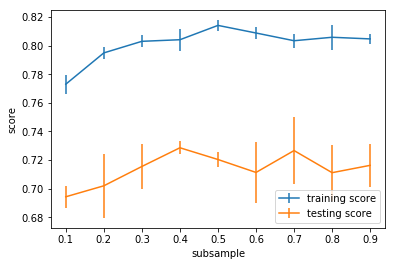

In [27]:
plot_overfit(X,y,ensemble.GradientBoostingRegressor,{'subsample':np.arange(.1,1,.1)})

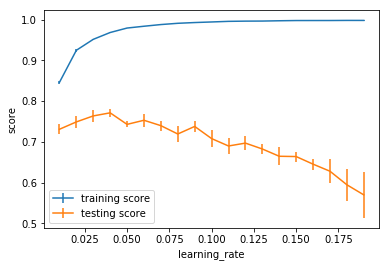

In [28]:
model = ensemble.GradientBoostingRegressor
params = {'learning_rate':np.arange(.01,.2,.01)}
param_static = {'max_depth':6,'subsample':.2,'n_estimators':500}
plot_overfit(X,y,model,params,param_static=param_static)

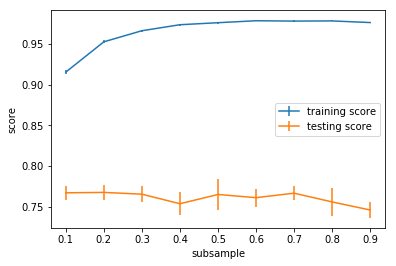

In [43]:
model = ensemble.GradientBoostingRegressor
params = {'subsample':np.arange(.1,1,.1)}
param_static = {'max_depth':6,'learning_rate':.03,'n_estimators':500}
plot_overfit(X,y,model,params,param_static=param_static)

In [41]:
model = ensemble.GradientBoostingRegressor(learning_rate=.03,subsample=.2,n_estimators=500,max_depth=6)

In [42]:
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,test_size = .3)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.76586200588030395

In [ ]:
from sklearn.model_selection import GridSearchCV

In [53]:

parameters = {'subsample':np.arange(.1,1,.2),
              'max_depth':[5,6],
              'learning_rate':np.arange(.01,.1,.01),
              'n_estimators':[500]}

model = ensemble.GradientBoostingRegressor()
grid_search = GridSearchCV(model, parameters, n_jobs=-2, verbose=1)
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 90 candidates, totalling 270 fits


[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-2)]: Done 270 out of 270 | elapsed:  1.9min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False),
       fit_params={}, iid=True, n_jobs=-2,
       param_grid={'subsample': array([ 0.1,  0.3,  0.5,  0.7,  0.9]), 'max_depth': [5, 6], 'learning_rate': array([ 0.01,  0.02,  0.03,  0.04,  0.05,  0.06,  0.07,  0.08,  0.09]), 'n_estimators': [500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [55]:
grid_search.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.050000000000000003, loss='ls', max_depth=5,
             max_features=None, max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, presort='auto', random_state=None,
             subsample=0.50000000000000011, verbose=0, warm_start=False)

In [45]:
from sklearn import pipeline, manifold, preprocessing, feature_selection, decomposition

steps = [
('features', preprocessing.PolynomialFeatures(degree=2)),
('feature_selection', feature_selection.SelectFromModel(linear_model.Lasso(alpha = .2))),
('model',ensemble.GradientBoostingRegressor())]

regression_pipeline = pipeline.Pipeline(steps)
regression_pipeline.fit(X_train,y_train)
regression_pipeline.score(X_test,y_test)

0.80085363829878264

In [91]:
regression_pipeline.named_steps

{'feature_selection': SelectFromModel(estimator=Lasso(alpha=0.2, copy_X=True, fit_intercept=True, max_iter=1000,
    normalize=False, positive=False, precompute=False, random_state=None,
    selection='cyclic', tol=0.0001, warm_start=False),
         prefit=False, threshold=None), 'features': FeatureUnion(n_jobs=1,
        transformer_list=[('Identity', IdentityTransform()), ('circles', TransformCircles()), ('moons', TransformMoons()), ('poly2', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False))],
        transformer_weights=None), 'model': GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
              max_leaf_nodes=None, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=Fal

In [48]:
from sklearn import pipeline, manifold, preprocessing, feature_selection, decomposition

# lets try using some feature tranforms, to our original X
combined_features = pipeline.FeatureUnion([('poly',preprocessing.PolynomialFeatures(degree=3)),
                                          ('pca', decomposition.PCA(n_components=2))])

# now lets lay out the steps of our model
# First we do the feature transforms with our feature union defined above
# Second we do feature selection with the built-in SelectFromModel
# Third we train the actual model
steps = [
('features', combined_features),
('feature_selection', feature_selection.SelectFromModel(linear_model.Lasso(alpha=.5))),
('model',linear_model.LinearRegression())]


#but at this point we have only defined what reg, no training has happened yet
regression_pipeline = pipeline.Pipeline(steps)
# calling fit here calls fit on the entire pipeline which in turn executes all its members
regression_pipeline.fit(X_train,y_train)
# calling score/predict will call fit then transform on each object in the pipeline
regression_pipeline.score(X_test,y_test)

0.82602709272169739

In [56]:


import logging
# Display progress logs on stdout
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s %(levelname)s %(message)s')


parameters = {
    'features__poly__degree': (2,3,4),
    'features__pca__n_components': (2,3,4),
    'model__fit_intercept':[True,False]
}


grid_search = GridSearchCV(regression_pipeline, parameters, n_jobs=-2, verbose=1)
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


/Users/ablevins/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ablevins/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ablevins/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ablevins/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objectiv

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(steps=[('features', FeatureUnion(n_jobs=1,
       transformer_list=[('poly', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False))],
       transformer_we...old=None)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))]),
       fit_params={}, iid=True, n_jobs=-2,
       param_grid={'features__poly__degree': (2, 3, 4), 'features__pca__n_components': (2, 3, 4), 'model__fit_intercept': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [100]:
print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

Best score: 0.821
Best parameters set:
	features__pca__n_components: 2
	features__poly__degree: 3
